<center><h1>Support Vector Machine (Машина Опорных Векторов)</h1></center>

# 1. Information

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.  
1) It is an inpatient encounter (a hospital admission).  
2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.  
3) The length of stay was at least 1 day and at most 14 days.  
4) Laboratory tests were performed during the encounter.  
5) Medications were administered during the encounter  
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
import math
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## 2.2 Import data

In [2]:
data=pd.read_csv("diabetic_data.csv", na_values='?')

In [3]:
data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


# 3. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [6]:
drop_list=['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'payer_code', 'medical_specialty',
           'admission_source_id']
data = data.drop(drop_list, axis=1)

Убираем ряд признаков, которые не имеют влияния на целевую переменную.

# 4. EDA

## 4.1 Target variable 'Readmitted'

In [7]:
def readmitted_bin(x):
    if x != 'NO':
        return 1
    else:
        return 0

In [8]:
data["readmitted"] = data["readmitted"].apply(readmitted_bin)

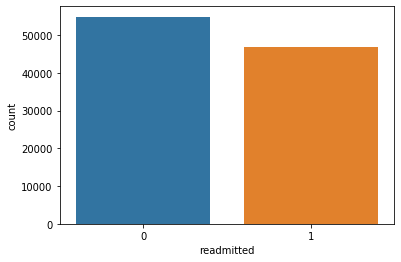

In [9]:
sns.countplot(x='readmitted',data=data)

В качестве целевой переменной выбирается реадмиссия (возвращение пациента в стационар). 

## 4.2 Race

In [10]:
data['race'].isna().sum()

2273

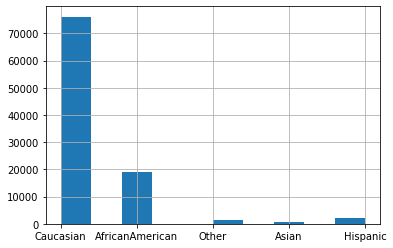

In [11]:
data.race.hist()

Из-за того, что испанцев и азиатов в выборке очень мало, их можно отнести к классу ‘Other’.

In [12]:
def race_merge(x):
    if (x=='Caucasian')or (x== 'AfricanAmerican'):
        return x
    else:
        return 'Other'

In [13]:
data["race"] = data["race"].apply(race_merge)

In [14]:
data_categ= (pd.get_dummies(data[['race']]))

In [15]:
data=data.drop(['race'], axis=1)
data=data.join(data_categ)
data.shape

(101766, 45)

Значений немного (всего 3), поэтому кодируем их методом one-hot.

## 4.3 Gender

In [16]:
data['gender'].isna().sum()

0

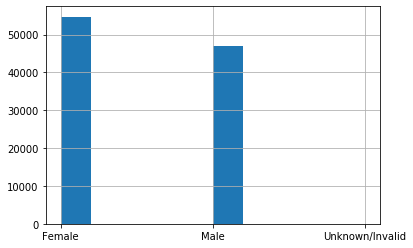

In [17]:
data['gender'].hist()

In [18]:
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [19]:
indexNames = data[ data['gender'] == 'Unknown/Invalid' ].index
data=data.drop(indexNames)

In [20]:
data_categ= (pd.get_dummies(data[['gender']]))
data=data.drop(['gender'], axis=1)
data=data.join(data_categ)
data.shape

(101763, 46)

## 4.4 Adge

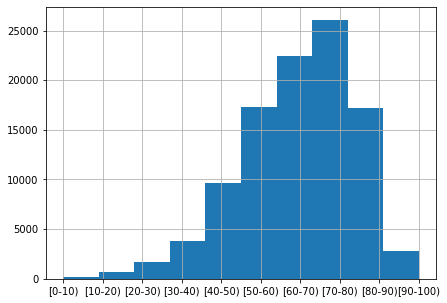

In [21]:
plt.figure(figsize=(7,5))
data['age'].hist(bins=10)

In [22]:
data['age'].isna().sum()

0

In [23]:
def age_trantform(x):
    if (x=='[0-10)'):
        return 5
    elif (x=='[10-20)'):
        return 15
    elif (x=='[20-30)'):
        return 25
    elif (x=='[30-40)'):
        return 35
    elif (x=='[40-50)'):
        return 45
    elif (x=='[50-60)'):
        return 55
    elif (x=='[60-70)'):
        return 65
    elif (x=='[70-80)'):
        return 75
    elif (x=='[80-90)'):
        return 85
    elif (x=='[90-100)'):
        return 95
    else:
        return x

In [24]:
data["age"] = data["age"].apply(age_trantform)

## 4.5 Weight

In [25]:
data['weight'].isna().sum()

98566

In [26]:
data=data.drop('weight', axis=1)

В признаке очень много не определенных значений (NaN). Лучше его выкинуть.

In [27]:
data.shape

(101763, 45)

## 4.6 Diagnosis

In [28]:
diag_col = ['diag_1', 'diag_2', 'diag_3']
data_diag=data[diag_col]

In [29]:
data_diag.head()

,diag_1,diag_2,diag_3
0,250.83,NaN,NaN
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250


In [30]:
data_diag.isna().sum()

diag_1      21
diag_2     358
diag_3    1423
dtype: int64

Признаки диагнозов пронумерованы согласно спецификации ICD9. Эти признаки можно упростить, разбив их по группам, согласно типу заболевания (: http://icd9.chrisendres.com/).

In [31]:
def deag_group(x):
    try:
        x=(np.trunc(np.float64(x)))
    except Exception as e:
        return 17
    if   (x>0   and x<=139): return 0
    elif (x>139 and x<=239): return 1
    elif (x>239 and x<=279): return 2
    elif (x>279 and x<=289): return 3
    elif (x>289 and x<=319): return 4
    elif (x>319 and x<=389): return 5
    elif (x>389 and x<=459): return 6
    elif (x>459 and x<=519): return 7
    elif (x>519 and x<=579): return 8
    elif (x>579 and x<=629): return 9
    elif (x>629 and x<=679): return 10
    elif (x>679 and x<=709): return 11
    elif (x>709 and x<=739): return 12
    elif (x>739 and x<=759): return 13
    elif (x>759 and x<=779): return 14
    elif (x>779 and x<=800): return 15
    elif (x>800 and x<=999): return 16
    else:                    return 17

In [32]:
for i in data_diag:
    data_diag[i] = data_diag[i].apply(deag_group)

In [33]:
data_diag.isna().sum()

diag_1    0
diag_2    0
diag_3    0
dtype: int64

In [34]:
data_diag.head()

,diag_1,diag_2,diag_3
0,2,17,17
1,2,2,2
2,10,2,17
3,0,2,6
4,1,1,2


Поскольку значений диагноза много (всего 17), можно применить hash trick для преобразования категориальных признаков.

In [35]:
def hash_categor(x, hash_space=256):
    return hash(str(x)) % hash_space

In [36]:
data_diag_hashed=data_diag.copy()
for i in data_diag:
    data_diag_hashed[i] = data_diag_hashed[i].apply(hash_categor)

In [37]:
data_diag_hashed.head()

,diag_1,diag_2,diag_3
0,173,29,29
1,173,173,173
2,84,173,29
3,85,173,40
4,135,135,173


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCBB5C8>,
      dtype=object)

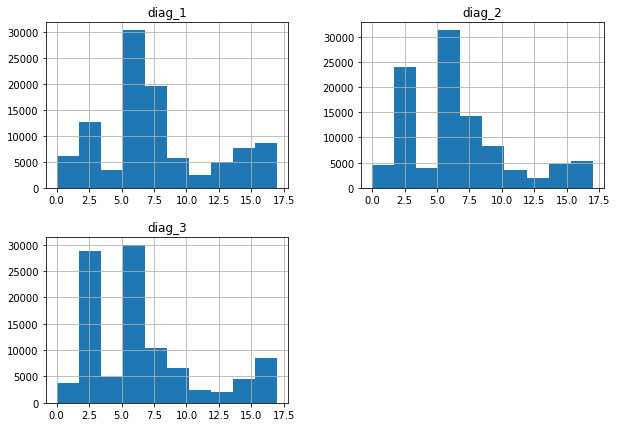

In [38]:
data_diag.hist(figsize=(10,7))

In [39]:
data=data.drop(diag_col, axis=1)
data=data.join(data_diag_hashed)

In [40]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_AfricanAmerican,race_Caucasian,race_Other,gender_Female,gender_Male,diag_1,diag_2,diag_3
0,5,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,1,0,1,0,173,29,29
1,15,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,0,1,0,1,0,173,173,173
2,25,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1,0,0,1,0,84,173,29
3,35,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0,1,0,0,1,85,173,40
4,45,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0,1,0,0,1,135,135,173


## 4.7 Diabetes medication

Это группа признаков отражающая назначение лекарств пациенту. Имеет четыре значения:  
•	 'No' – не назначен;  
•	‘Steady’ – не изменять количество принимаемого препарата;  
•	‘Up’ – повысить количество принимаемого препарата;  
•	‘Down’ – понизить количество принимаемого препарата.  

In [41]:
diab_med = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
            'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
            'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone']

In [42]:
data_diab_med = data[diab_med].copy()

In [43]:
def diab_med_transf (x):
    if (x == 'No'):
        return 0
    elif (x == 'Steady'):
        return 1
    elif (x == 'Up'):
        return 2
    elif (x == 'Down'):
        return -1
    else:
        np.nan

In [44]:
for i in diab_med:
    data_diab_med[i] = data_diab_med[i].apply(diab_med_transf)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF5E188>,
      dtype=object)

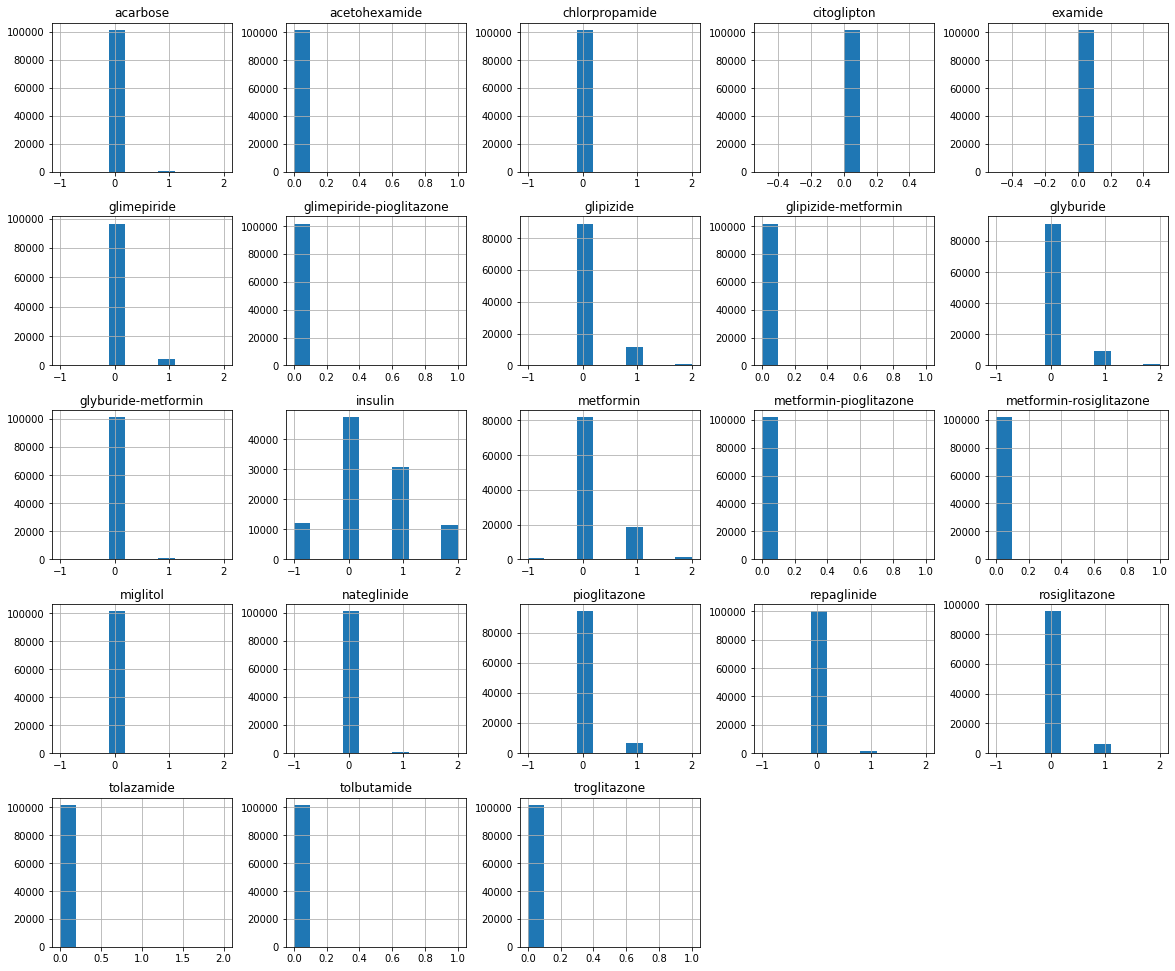

In [45]:
data_diab_med.hist(figsize=(20,17))

In [46]:
data_diab_med.isna().sum()

metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
dtype: int64

In [47]:
data=data.drop(diab_med, axis=1)
data=data.join(data_diab_med)

In [48]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,race_AfricanAmerican,race_Caucasian,race_Other,gender_Female,gender_Male,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,5,1,41,0,1,0,0,0,1,None,None,No,No,0,0,1,0,1,0,173,29,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,None,None,Ch,Yes,1,0,1,0,1,0,173,173,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,25,2,11,5,13,2,0,1,6,None,None,No,Yes,0,1,0,0,1,0,84,173,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,2,44,1,16,0,0,0,7,None,None,Ch,Yes,0,0,1,0,0,1,85,173,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,45,1,51,0,8,0,0,0,5,None,None,Ch,Yes,0,0,1,0,0,1,135,135,173,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 4.7 Max_glu_serum test

In [49]:
test_res = ['max_glu_serum', 'A1Cresult']

In [50]:
def max_glu_serum_trans (x):
    if (x=='None'):
        return 0
    elif (x=='Norm'):
        return 1
    elif (x=='>200'):
        return 10
    elif (x=='>300'):
        return 100
    else:
        np.nan

In [51]:
data['max_glu_serum'] = data['max_glu_serum'].apply(max_glu_serum_trans)

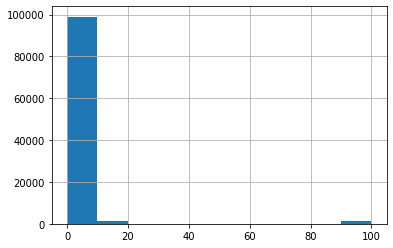

In [52]:
data['max_glu_serum'].hist()

## 4.8 A1Cresult test

In [53]:
def A1Cresult_trans (x):
    if (x=='None'):
        return 0
    elif (x=='Norm'):
        return 1
    elif (x=='>7'):
        return 10
    elif (x=='>8'):
        return 100
    else:
        np.nan

In [54]:
data_test = data['A1Cresult']
data['A1Cresult'] = data['A1Cresult'].apply(A1Cresult_trans)

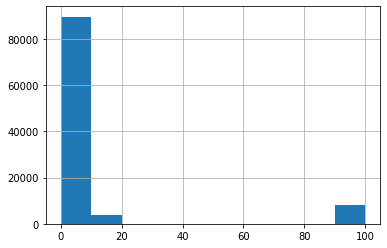

In [55]:
data['A1Cresult'].hist()

## 4.9 DiabetesMed

In [56]:
def diabetesMed_trans (x):
    if (x=='No'):
        return 0
    elif (x=='Yes'):
        return 1

In [57]:
data['diabetesMed'] = data['diabetesMed'].apply(diabetesMed_trans)

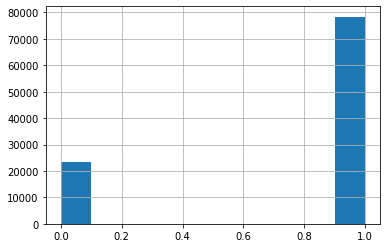

In [58]:
data['diabetesMed'].hist()

## 4.10 Change

In [59]:
def change_trans (x):
    if (x=='No'):
        return 0
    elif (x=='Ch'):
        return 1

In [60]:
data['change'] = data['change'].apply(change_trans)

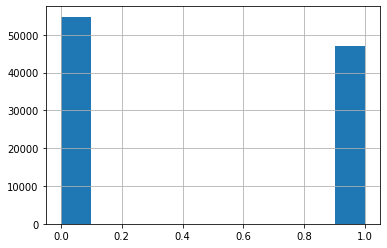

In [61]:
data['change'].hist()

## 4.11 Numeric variables

In [62]:
num_vars=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014CEE548>,
      dtype=object)

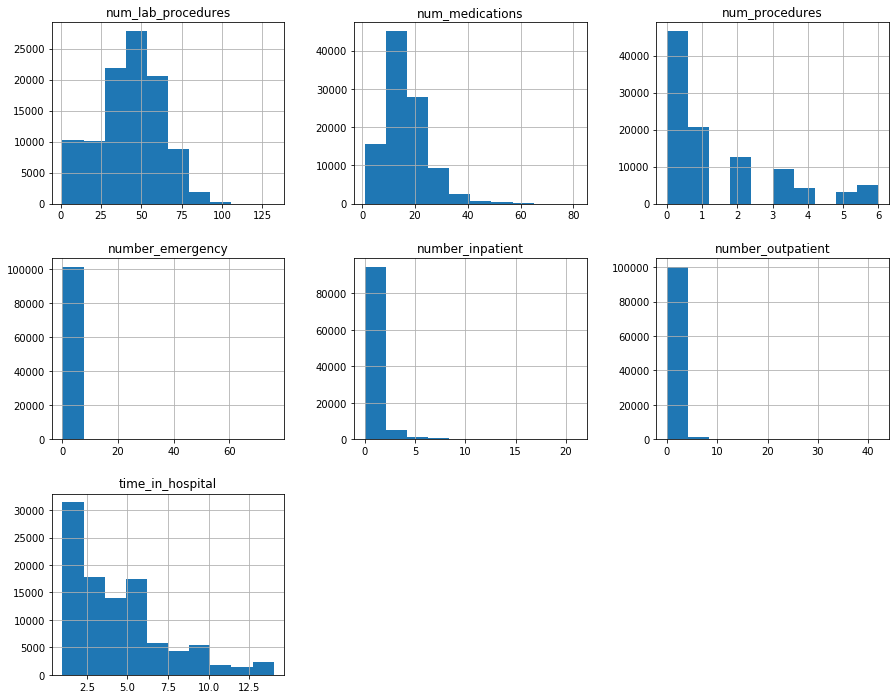

In [63]:
data[num_vars].hist(figsize=(15,12))

In [64]:
data[num_vars].describe(percentiles = [0.5, 0.25, 0.75, 0.95])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585
std,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000
95%,11.000000,73.000000,5.000000,31.000000,2.000000,1.000000,3.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000


In [65]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.01) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.99) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

In [66]:
data[num_vars] = windsorization(
    data[num_vars], cols=num_vars, borders_type="iqr", strategy='both')

In [67]:
# We scale our data so that they are of the same dimension
dataNorm = (data[num_vars] - data[num_vars].mean()) / (data[num_vars].std())

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

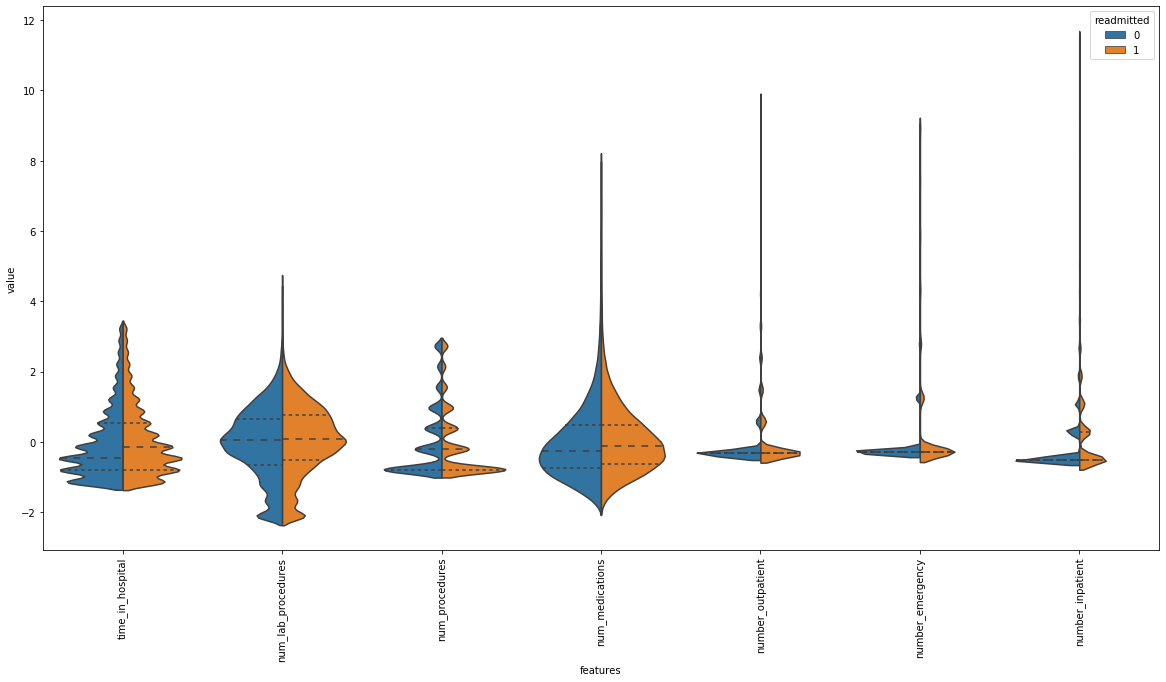

In [68]:
dataVar = pd.concat([data.readmitted,dataNorm.iloc[:,0: 7]],axis=1)
dataVar = pd.melt(dataVar,id_vars="readmitted", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="readmitted", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

(7.0, 0.0)

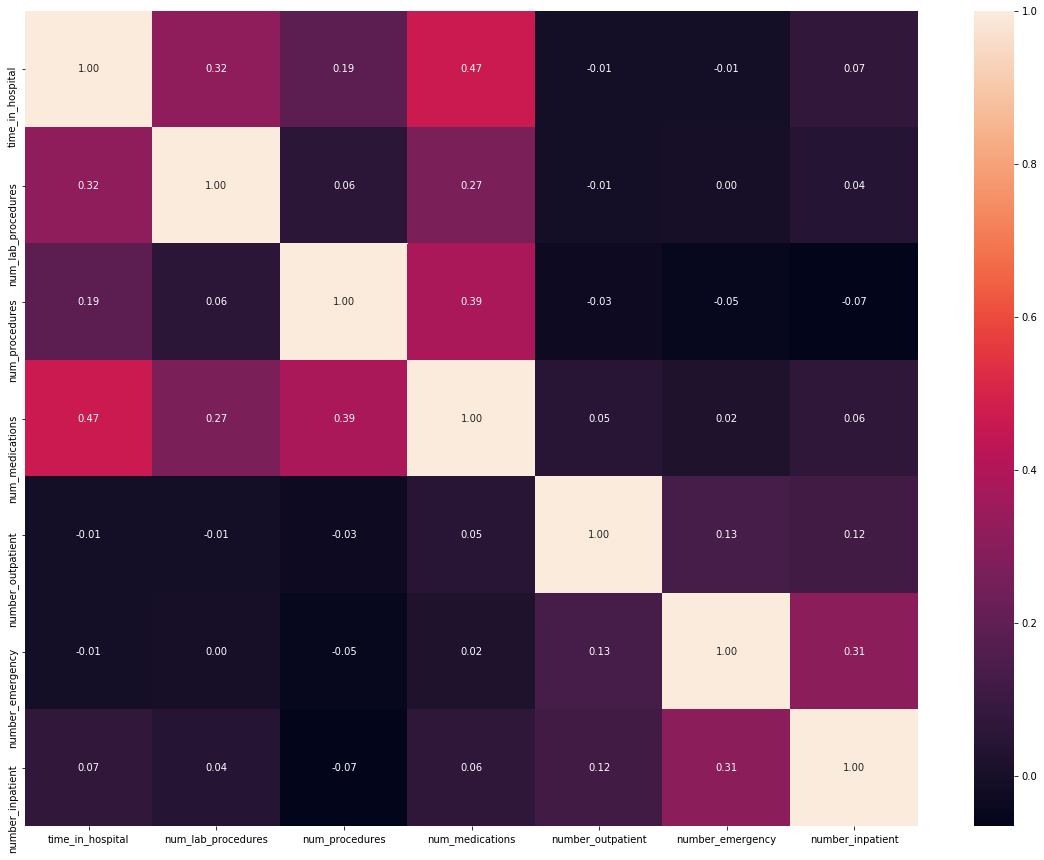

In [69]:
# Draw small HeatMap
Corr =  data[num_vars].dropna().corr()
plt.figure(figsize=(20,15));
ax=sns.heatmap(Corr, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Из признаков удалены явные выбросы. Корреляции между признаками не наблюдается.

# 5 Machine learning 

## 5.1 Import packages

In [70]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

## 5.2 Quality Report function

In [71]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

## 5.3 Data Split and Scaling

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['readmitted'], axis=1),
    data['readmitted'], test_size=0.3,
    stratify=data['readmitted'],
    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 5.4 Logistics Regression Model

In [73]:
model_LogR = LogisticRegression(C=100.0, penalty='l1', solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred_LogR=model_LogR.predict(X_test_scaled)
qual = quality_report(pred_LogR, y_test.values)


=== Quality Report ===
Accuracy: 	 0.623
Precision: 	 0.424
Recall: 	 0.636
f1_score: 	 0.509
ROC-AUC: 	 0.626



### 5.3.1 Feature Importance

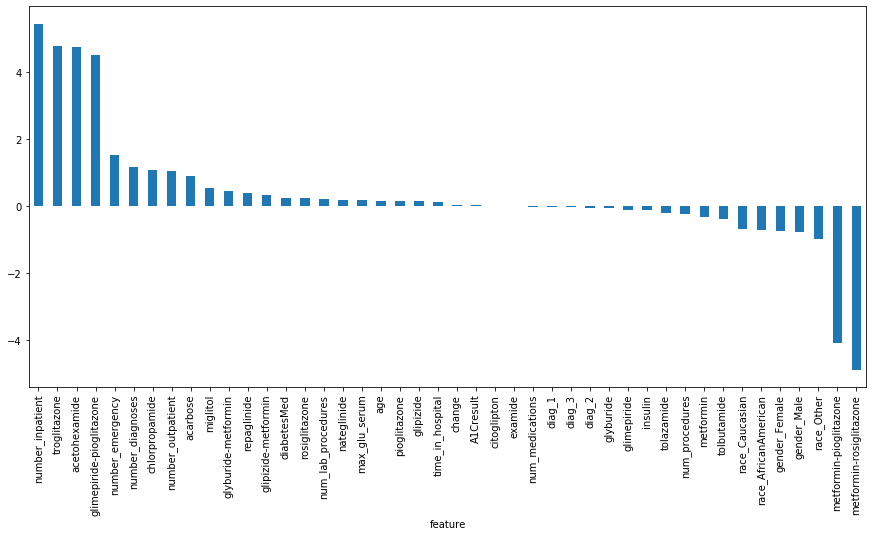

In [74]:
featureImportance = pd.DataFrame({"feature": data.drop('readmitted',axis=1).columns, 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 7));

## 5.5 SVM Model

### 5.5.1 Initial Model

In [79]:
model_svc = SVC(    max_iter=10,
                    random_state=0,
                )
model_svc.fit(X_train_scaled, y_train)
pred_svc = model_svc.predict(X_test_scaled)
qual = quality_report(pred_svc, y_test.values)


=== Quality Report ===
Accuracy: 	 0.458
Precision: 	 0.910
Recall: 	 0.456
f1_score: 	 0.607
ROC-AUC: 	 0.469



### 5.5.2 Grid search by parameters

In [80]:
param_grid = {
    'C': np.logspace(-5, 2, 20),
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'class_weight':['balanced', None]
}

search = RandomizedSearchCV(model_svc, param_grid, n_jobs=-1, cv=5, random_state=0)#, cv=5
search.fit(X_train_scaled, y_train)
search.best_params_

{'kernel': 'rbf', 'class_weight': None, 'C': 0.0006951927961775605}

In [81]:
pred_svc =search.best_estimator_.predict(X_test_scaled)
qual = quality_report(pred_svc, y_test.values)


=== Quality Report ===
Accuracy: 	 0.458
Precision: 	 0.910
Recall: 	 0.456
f1_score: 	 0.607
ROC-AUC: 	 0.469



### 5.5.3 Model with Grid search results

In [84]:
model_svc = SVC(
                kernel='rbf',
                class_weight= None,
                C= 0.0006951927961775605,
                max_iter=10000,
                random_state=0
)
model_svc.fit(X_train_scaled, y_train)
pred_svc = model_svc.predict(X_test_scaled)
qual = quality_report(pred_svc, y_test.values)


=== Quality Report ===
Accuracy: 	 0.480
Precision: 	 0.914
Recall: 	 0.467
f1_score: 	 0.618
ROC-AUC: 	 0.532



## 6 Conclusion

Оптимальными параметрами для SVM модели оказались: 
* *kernel*: 'rbf',  
* *class_weight*: None,  
* *C*: 0.0006951927961775605}.  

Однако, логистическая регрессия справилась с задачей лучше. Особенно следует обратить на метрику Recall, поскольку в данном случае ее максимизация более приоритетна.  При этом требования к ресурсам у логистической регрессии меньше, чем у SVM.